In [ ]:
!pip install pandas scikit-learn fasttext matplotlib



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.12.0-py3-none-any.whl (234 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4227138 sha256=a57b760f80eb72353d9a1a01b7e9613211fb2731f083da98283b2c32fdd8ac42
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import fasttext
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
df = pd.read_csv('/content/amazon_reviews.csv', skiprows=[54315])

In [ ]:
# Load the dataset from CSV
df = pd.read_csv('/content/amazon_reviews.csv')

# Display the first few rows of the dataset to understand its structure
print(df.head())



   Unique_ID Category                           Review_Header  \
0     136040  smartTv                                Nice one   
1     134236   mobile  Huge battery life with amazing display   
2     113945    books                              Four Stars   
3     168076  smartTv                            Nice quality   
4     157302    books                               Nice book   

                                         Review_text  Rating Sentiments  
0                                         I liked it       5   Positive  
1  I bought the phone on Amazon and been using my...       5   Positive  
2  Awesome book at reasonable price, must buy ......       4   Positive  
3                                               good       5   Positive  
4  The book is fine,not bad,contains nice concept...       3    Neutral  


In [ ]:
# Convert text labels to numerical labels
df['Sentiments'] = df['Sentiments'].map({'Negative': '__label__1', 'Neutral': '__label__2', 'Positive': '__label__3'})

# Split the dataset into features (X) and target (y)
X = df['Review_text']
y = df['Sentiments']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())

27
5


In [ ]:
import numpy as np

X_train = X_train.replace(np.nan, '')
X_test = X_test.replace(np.nan, '')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer()

In [ ]:
vectorizer = TfidfVectorizer()

In [ ]:
X_train_vec = vectorizer.fit_transform(X_train)

In [ ]:
X_test_vec = vectorizer.transform(X_test)

In [ ]:
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
# Check for missing values in the dataset
print("Number of missing values in X_train:", X_train.isnull().sum())
print("Number of missing values in y_train:", y_train.isnull().sum())

# Drop rows with missing values
X_train = X_train.dropna()
y_train = y_train.dropna()

# Reindex after dropping rows
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Check again for missing values
print("Number of missing values in X_train after handling:", X_train.isnull().sum())
print("Number of missing values in y_train after handling:", y_train.isnull().sum())


Number of missing values in X_train: 0
Number of missing values in y_train: 0
Number of missing values in X_train after handling: 0
Number of missing values in y_train after handling: 0


In [ ]:
# Combine X_train and y_train into a single DataFrame
train_df = pd.concat([X_train, y_train], axis=1)

# Drop rows with missing values from the combined DataFrame
train_df = train_df.dropna()

# Separate X_train and y_train again
X_train = train_df['Review_text']
y_train = train_df['Sentiments']

# Reindex after dropping rows
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Create a CountVectorizer to convert text into a matrix of token counts
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [ ]:
# Create a Multinomial Naive Bayes classifier
nb_clf = MultinomialNB()

# Train the classifier
nb_clf.fit(X_train_vec, y_train)

MultinomialNB()

In [ ]:
# Predict the sentiment for the test set
nb_y_pred = nb_clf.predict(X_test_vec)

In [ ]:
# Check unique labels in y_test and nb_y_pred
print("Unique labels in y_test:", y_test.unique())
print("Unique labels in nb_y_pred:", pd.Series(nb_y_pred).unique())


Unique labels in y_test: ['__label__3' '__label__2' '__label__1']
Unique labels in nb_y_pred: ['__label__3' '__label__1' '__label__2']


In [ ]:
# Convert unknown labels to a known label
nb_y_pred_mapped = [label if label in ['__label__1', '__label__2', '__label__3'] else '__label__1' for label in nb_y_pred]



In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
nb_y_pred = pd.Series(nb_y_pred)

In [ ]:
# Print the type of y_test and nb_y_pred
print(type(y_test))
print(type(nb_y_pred))

# Print the unique values in y_test and nb_y_pred
print(y_test.unique())
print(nb_y_pred.unique())

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
['__label__3' '__label__2' '__label__1']
['__label__3' '__label__1' '__label__2']


In [ ]:
# Print the type of y_test and nb_y_pred
print(type(y_test))
print(type(nb_y_pred))

# Print the unique values in y_test and nb_y_pred
print(y_test.unique())
print(nb_y_pred.unique())

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
['__label__3' '__label__2' '__label__1']
['__label__3' '__label__1' '__label__2']


In [ ]:
print(y_test.value_counts())
print(nb_y_pred.value_counts())

Sentiments
__label__3    9452
__label__1    1847
__label__2     879
Name: count, dtype: int64
__label__3    10329
__label__1     1756
__label__2       93
Name: count, dtype: int64


In [ ]:
nb_y_pred_mapped = [label if label in ['__label__1', '__label__2', '__label__3'] else '__label__1' for label in nb_y_pred]


In [ ]:
print(type(nb_y_pred))

<class 'pandas.core.series.Series'>


In [ ]:
print(nb_y_pred.unique())

['__label__3' '__label__1' '__label__2']


In [ ]:
print(type(y_test))

<class 'pandas.core.series.Series'>


In [ ]:
print(y_test.unique())

['__label__3' '__label__2' '__label__1']


In [ ]:
df = df.dropna(subset=['Review_text'])

In [ ]:
print(y_test.unique())

['__label__3' '__label__2' '__label__1']


In [ ]:
df['Review_text'].fillna('__label__1', inplace=True)


<ipython-input-40-658e87d53b07>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review_text'].fillna('__label__1', inplace=True)


In [ ]:
print(y_test.unique())

['__label__3' '__label__2' '__label__1']


In [ ]:
# Calculate evaluation metrics
nb_accuracy = accuracy_score(y_test, nb_y_pred)
nb_precision = precision_score(y_test, nb_y_pred, average='weighted')
nb_recall = recall_score(y_test, nb_y_pred, average='weighted')
nb_f1 = f1_score(y_test, nb_y_pred, average='weighted')

In [ ]:
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes Precision:", nb_precision)
print("Naive Bayes Recall:", nb_recall)
print("Naive Bayes F1 Score:", nb_f1)

Naive Bayes Accuracy: 0.8594186237477418
Naive Bayes Precision: 0.8191572986673945
Naive Bayes Recall: 0.8594186237477418
Naive Bayes F1 Score: 0.8305088102959454


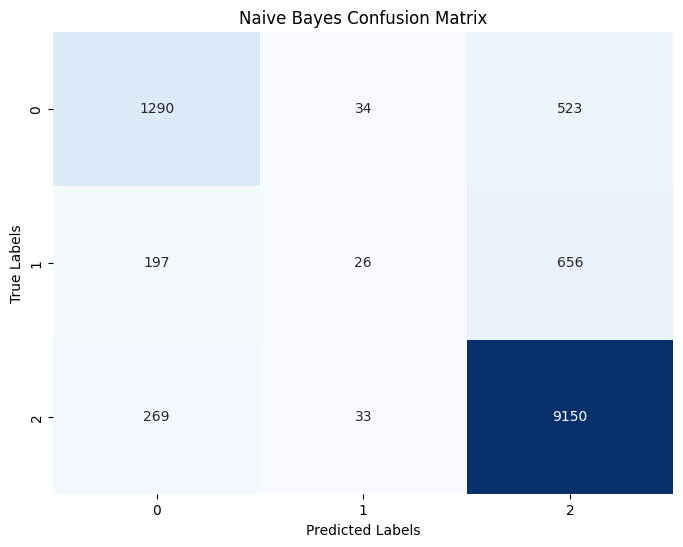

In [ ]:
# Create a confusion matrix for Naive Bayes
nb_conf_matrix = confusion_matrix(y_test, nb_y_pred_mapped)

# Plot the confusion matrix for Naive Bayes
plt.figure(figsize=(8, 6))
sns.heatmap(nb_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

<ipython-input-45-40131d59124d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='viridis')


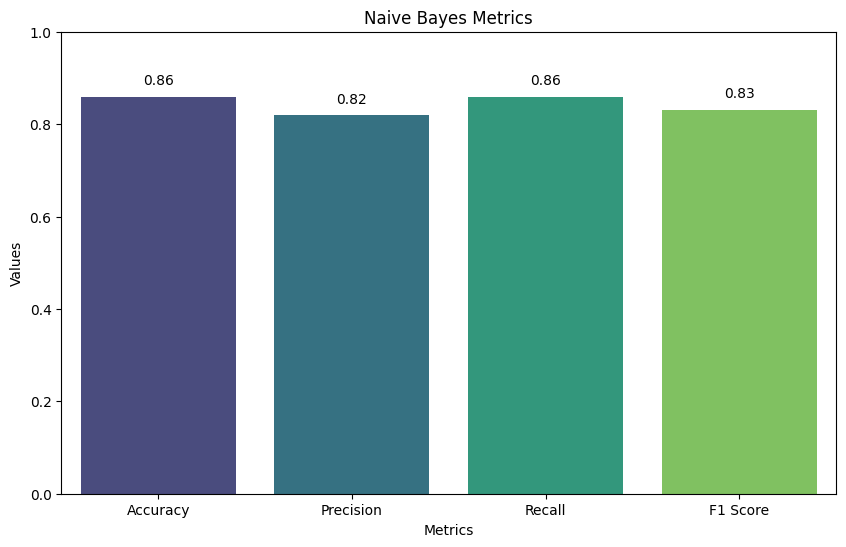

In [ ]:
# Create bar plots for the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [nb_accuracy, nb_precision, nb_recall, nb_f1]

plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=values, palette='viridis')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Naive Bayes Metrics')
plt.ylim(0, 1)  # Set y-axis limit to match score range
for i, value in enumerate(values):
    plt.text(i, value + 0.02, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()

In [ ]:
import time
import psutil
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Start the timer
start_time = time.time()

# Your sentiment analysis code
# ...

# End the timer
end_time = time.time()

# Calculate and print the elapsed time
elapsed_time = end_time - start_time
print("Elapsed Time:", elapsed_time, "seconds")

# Get the memory usage
memory_usage = psutil.Process().memory_info().rss
print("Memory Usage:", memory_usage, "bytes")

# Calculate evaluation metrics
nb_accuracy = accuracy_score(y_test, nb_y_pred_mapped)
nb_precision = precision_score(y_test, nb_y_pred_mapped, average='weighted')
nb_recall = recall_score(y_test, nb_y_pred_mapped, average='weighted')
nb_f1 = f1_score(y_test, nb_y_pred_mapped, average='weighted')

# Print the evaluation metrics
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes Precision:", nb_precision)
print("Naive Bayes Recall:", nb_recall)
print("Naive Bayes F1 Score:", nb_f1)


Elapsed Time: 5.316734313964844e-05 seconds
Memory Usage: 315957248 bytes
Naive Bayes Accuracy: 0.8594186237477418
Naive Bayes Precision: 0.8191572986673945
Naive Bayes Recall: 0.8594186237477418
Naive Bayes F1 Score: 0.8305088102959454
